# Pet Supplies - 2212 by James Rendon (jamie023)

## Task 1

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import CSV dataset
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/pet_supplies_2212.csv')
df.head(3)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1


In [2]:
# Convert product_id from int to str
df['product_id'] = df['product_id'].astype(str)
df.head(3)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1


In [3]:
df['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [4]:
# Replace missing values in category column with "Unknown"
df['category'] = df['category'].replace('-', 'Unknown')
df['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

In [5]:
# Correcting characters in size column
df['size'] = df['size'].replace(['small', 'medium', 'Small', 'SMALL', 'Medium', 'large', 'MEDIUM', 'Large', 'LARGE'], ['Small', 'Medium', 'Small', 'Small', 'Medium', 'Large', 'Medium','Large', 'Large'])
df['size'].value_counts()

Small     754
Medium    492
Large     254
Name: size, dtype: int64

In [6]:
# Replace "unlisted" value in price column with overall median price of the price column
overall_median_price = pd.to_numeric(df['price'], errors='coerce').median()
df['price'] = df['price'].replace('unlisted', overall_median_price)

In [7]:
# Replace missing values with 0 in rating column
df['rating'].fillna(0).value_counts()

5.0    304
6.0    299
4.0    283
3.0    190
0.0    150
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64

| Task | product_id | category | animal | size | price | sales | rating | repeat_purchase | 
|---|---|---|---|---|---|---|---|---|
| **a** | dtype should be replaced to string | there are missing values or "-". | matches criteria. | values contain different cases of texts and unnecessary spaces which can be a problem when grouping together and analysing. This could be fixed by altering the values matching the criteria to gain more insights. | there are missing values. | matches criteria. | there are missing values. | matches criteria.
| **b** | 0 | 25 "-" | 0 | 0 | 150 "unlisted" | 0 | 150 "NA" | 0
| **c** | used astype() function to change the integer to a string. | used replace() function to change "-" values to "Unknown". | no alterations. | used value_counts() function to group the values in the column then used the replace() function to alter values that matches the criteria. | using pandas as pd library, used pd.to_numeric() function to convert the column into a dataframe with the option of "errors ='coerce'" which converts non-numeric values into a NaN value. After which, used median() function to get the median of the sales column which returns a certain value. Using replace() function, to change the "unlisted" value in the column to the Overall Median Price. | no alterations. | used fillna(0) function to replace missing values with 0. | no alterations. |

## Task 2

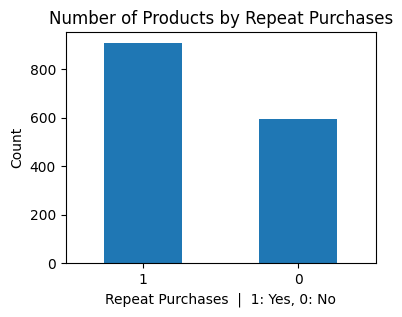

In [8]:
# Bar chart that shows how many products are repeat purchases
plt.figure(figsize=(4, 3))
df['repeat_purchase'].value_counts().plot(kind='bar')
plt.xlabel('Repeat Purchases  |  1: Yes, 0: No')
plt.ylabel('Count')
plt.title('Number of Products by Repeat Purchases')
plt.xticks(rotation=0)
plt.show()

## Task **2 (a)**

In [9]:
# State which category of the variable repeat purchases has the most observations
category_counts = df.loc[df['repeat_purchase'] == 1,'category'].value_counts()
category_counts

Equipment    221
Medicine     153
Housing      152
Food         151
Toys         145
Accessory     70
Unknown       14
Name: category, dtype: int64

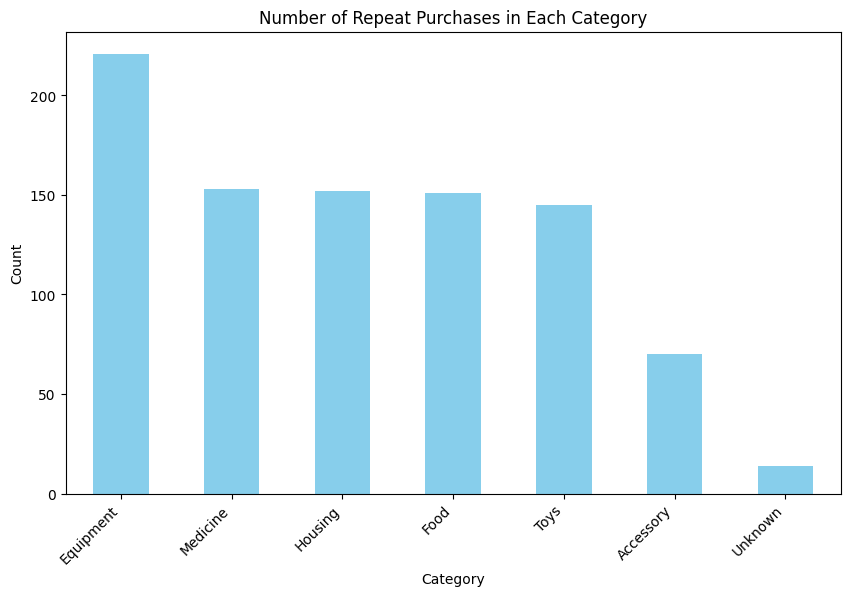

In [10]:
# Create the bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Repeat Purchases in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()

The **Equipment** category has the most observations.

## Task 2 (b)

In [11]:
# Explain whether the observations are balance across categories of the variable repeat purchases
category_isbalanced = df.groupby('category')['repeat_purchase'].describe()
category_isbalanced

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Accessory,126.0,0.555556,0.498888,0.0,0.0,1.0,1.0,1.0
Equipment,370.0,0.597297,0.491106,0.0,0.0,1.0,1.0,1.0
Food,260.0,0.580769,0.494385,0.0,0.0,1.0,1.0,1.0
Housing,227.0,0.669604,0.471395,0.0,0.0,1.0,1.0,1.0
Medicine,237.0,0.645570,0.479353,0.0,0.0,1.0,1.0,1.0
Toys,255.0,0.568627,0.496242,0.0,0.0,1.0,1.0,1.0
Unknown,25.0,0.560000,0.506623,0.0,0.0,1.0,1.0,1.0


In [12]:
df.groupby('category')['repeat_purchase'].std() / df.groupby('category')['repeat_purchase'].mean()

category
Accessory    0.897998
Equipment    0.822214
Food         0.851259
Housing      0.703992
Medicine     0.742527
Toys         0.872701
Unknown      0.904684
Name: repeat_purchase, dtype: float64

**Yes, there is balance in repeat purchases across all categories**.

Each category's standard deviation is relatively small (around 0.5 in each category) means that the values are tightly clustered around the mean. Which means that the values can be deemed as balanced in this dataset.

Also, putting the threshold of all category's standard deviation less than the each category's mean. 

## Task 3

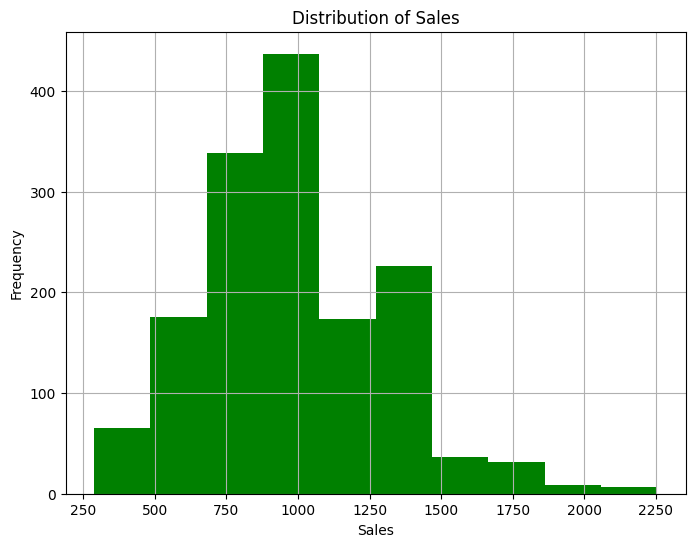

In [13]:
# Distribution of all of the sales
plt.figure(figsize=(8, 6))
df['sales'].hist(bins=10 , color='green')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

The Distribution of Sales histogram chart shows that most of the sales are around the 1000 bin area. 

It is Skewed to the Right meaning that the mode is less than the median which is less than the mean. 

## Task 4

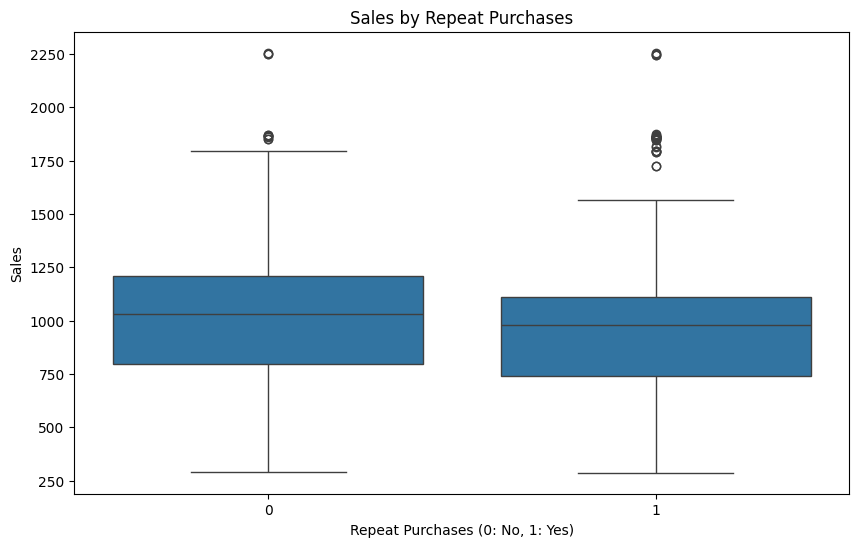

In [14]:
# Relationship between repeat purchases and sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.xlabel('Repeat Purchases (0: No, 1: Yes)')
plt.ylabel('Sales')
plt.title('Sales by Repeat Purchases')
plt.show()

Total sales on whether it is a repeat purchase or not seems identical (with non-repeat purchase being a little higher). 

It could mean several things..
- Products being sold on repeat might be low-cost or necessity purchases, leading to repeat buys like food, medicine, etcetera.
- Products being sold in non-repeat purchase can be a single time product like in the housing and toys category.